# Torch basics

> Author : Badr TAJINI - Machine Learning 2 & Deep learning - ECE 2025-2026

---

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

In [2]:
torch.__version__

'2.9.0+cpu'

Largely inspired from the tutorial [What is PyTorch?](https://pytorch.org/tutorials/beginner/former_torchies/tensor_tutorial.html)

Tensors are used to encode the signal to process, but also the internal states and parameters of models.

Manipulating data through this constrained structure allows to use CPUs and GPUs at peak performance.



## Tensors

Construct a 3x5 matrix, uninitialized:

In [3]:
# Sets the default floating point dtype.
# This type will be used as default floating point type for type inference in torch.tensor().
torch.set_default_tensor_type('torch.FloatTensor')

/usr/local/lib/python3.12/dist-packages/torch/__init__.py:1275: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /pytorch/torch/csrc/tensor/python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [4]:
x = torch.empty(3,5)
print(x.type())
print(x)

torch.FloatTensor
tensor([[0.0000e+00, 4.3217e-26, 1.2360e-17, 1.5625e-39, 0.0000e+00],
        [3.3875e-15, 2.3822e-44, 0.0000e+00, 1.5879e-39, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5614e-39, 0.0000e+00]])


In [5]:
x = torch.randn(3,5)
print(x)

tensor([[-0.0682, -0.7756,  0.4628,  0.8630, -0.4688],
        [-1.1108,  1.1763,  0.2968,  2.2339,  0.6190],
        [-0.6452, -0.0878, -0.5729,  0.1170,  0.9786]])


In [6]:
print(x.size())

torch.Size([3, 5])


torch.Size is in fact a [tuple](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences), so it supports the same operations.

In [7]:
x.size()[1]

5

In [8]:
x.size() == (3,5)

True

Importance of the brackets when defining a tensor

In [9]:
a = torch.tensor([2.0])
print(type(a))
print(a.dtype)
print(a.size())

b = torch.tensor(2.0)
print(type(b))
print(b.dtype)
print(b.size())

<class 'torch.Tensor'>
torch.float32
torch.Size([1])
<class 'torch.Tensor'>
torch.float32
torch.Size([])


Select some columns

In [10]:
cols = torch.zeros(5, dtype=torch.bool)
print(cols)
cols[1] = True
cols[4] = True
print(cols)
c = x[:, cols]  # selects all rows, 4th column and  5th column from a
print(c)

tensor([False, False, False, False, False])
tensor([False,  True, False, False,  True])
tensor([[-0.7756, -0.4688],
        [ 1.1763,  0.6190],
        [-0.0878,  0.9786]])


All operations on the tensor that operate in-place on it will have an _ postfix.

In [11]:
# x will be filled with the value 3.5
x.fill_(3.5)
print(x)

tensor([[3.5000, 3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000, 3.5000]])


## Bridge to numpy

In [12]:
y = x.numpy()
print(y)

[[3.5 3.5 3.5 3.5 3.5]
 [3.5 3.5 3.5 3.5 3.5]
 [3.5 3.5 3.5 3.5 3.5]]


In [13]:
a = np.ones(5)
b = torch.from_numpy(a)
print(b)


tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [14]:
xr = torch.randn(3, 5)
a = np.ones(5).astype(int)
b = torch.from_numpy(a)
print(xr)
print(b)

tensor([[ 1.9550, -0.5807,  0.2492, -0.7235,  0.4856],
        [-0.0389, -0.5451,  0.4577,  0.1165, -1.9837],
        [-0.8395, -0.1386,  0.3716, -0.9150, -0.4897]])
tensor([1, 1, 1, 1, 1])


### Question: print the type of the content (data) of variables a, b and xr

In [15]:
# COMPLETE THE CELL
print(f"Type de a: {a.dtype}")
print(f"Type de b: {b.dtype}")
print(f"Type de xr: {xr.dtype}")

Type de a: int64
Type de b: torch.int64
Type de xr: torch.float32


## Operations

There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1

In [16]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

tensor([[1.1705, 0.5846, 1.3413],
        [1.3918, 0.6652, 0.7439],
        [0.2706, 1.0556, 1.1654],
        [0.9528, 0.7981, 0.7971],
        [1.1567, 0.5320, 1.5748]])


Addition: syntax 2

In [17]:
print(torch.add(x, y))

tensor([[1.1705, 0.5846, 1.3413],
        [1.3918, 0.6652, 0.7439],
        [0.2706, 1.0556, 1.1654],
        [0.9528, 0.7981, 0.7971],
        [1.1567, 0.5320, 1.5748]])


Addition: providing an output tensor as argument

In [18]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[1.1705, 0.5846, 1.3413],
        [1.3918, 0.6652, 0.7439],
        [0.2706, 1.0556, 1.1654],
        [0.9528, 0.7981, 0.7971],
        [1.1567, 0.5320, 1.5748]])


Addition: in-place

In [19]:
# adds x to y
y.add_(x)
print(y)

tensor([[1.1705, 0.5846, 1.3413],
        [1.3918, 0.6652, 0.7439],
        [0.2706, 1.0556, 1.1654],
        [0.9528, 0.7981, 0.7971],
        [1.1567, 0.5320, 1.5748]])


**Note:** Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.



Any operation that mutates a tensor in-place is post-fixed with an ```_```

For example: ```x.copy_(y)```, ```x.t_()```, will change ```x```.

In [20]:
print(x.t())

tensor([[0.2944, 0.8176, 0.2500, 0.2920, 0.4666],
        [0.1380, 0.1184, 0.7072, 0.2407, 0.4302],
        [0.3841, 0.6478, 0.7710, 0.3721, 0.9287]])


In [21]:
print(x)

tensor([[0.2944, 0.1380, 0.3841],
        [0.8176, 0.1184, 0.6478],
        [0.2500, 0.7072, 0.7710],
        [0.2920, 0.2407, 0.3721],
        [0.4666, 0.4302, 0.9287]])


In [22]:
x.t_()
print(x)

tensor([[0.2944, 0.8176, 0.2500, 0.2920, 0.4666],
        [0.1380, 0.1184, 0.7072, 0.2407, 0.4302],
        [0.3841, 0.6478, 0.7710, 0.3721, 0.9287]])


You can use standard NumPy-like indexing with all bells and whistles!

In [23]:
print(x[:, 1])

tensor([0.8176, 0.1184, 0.6478])


Resizing (very useful): If you want to resize/reshape tensor, you can use ``torch.view``:

In [24]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number

In [25]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.3624])
0.36239755153656006


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  [here](https://pytorch.org/docs/torch).

## 3D Tensors

### Question: What is the size of the following tensor?

In [ ]:
y = torch.tensor([
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ]
   ])
print(y)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])


In [ ]:
# COMPLETE THE CELL
y.size()

torch.Size([3, 2, 3])

:D'après le resultat précédent, la taille du tenseur est celle-là : torch.Size([3, 2, 3]).

Le tenseur y contient 3 blocs de matrices. Chaque bloc possède 2 lignes, et chaque ligne contient 3 colonnes.

### Question: Explain the result of the next cell

In [ ]:
torch.sum(y, dim=0)

tensor([[ 3,  6,  9],
        [12, 15, 18]])

Cette opération effectue une somme suivant les matrices.

Comme les trois matrices de y sont identiques (toutes égales à [[1, 2, 3], [4, 5, 6]]), le résultat est égal à la multiplication par 3 de chaque élément:

1+1+1 = 3; 2+2+2 = 6; 3+3+3 = 9; 4+4+4 = 12; 5+5+5 = 15; 6+6+6 = 18

## Broadcasting semantics

In short, if a PyTorch operation supports broadcast, then its Tensor arguments can be automatically expanded to be of equal sizes (without making copies of the data).

Two tensors are “broadcastable” if the following rules hold:

*   Each tensor has at least one dimension.
*   When iterating over the dimension sizes, **starting at the trailing dimension**, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

If two tensors x, y are “broadcastable”, the resulting tensor size is calculated as follows:
* If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
* Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

More details [here](https://pytorch.org/docs/stable/notes/broadcasting.html)



In [ ]:
# can line up trailing dimensions to make reading easier
x=torch.empty(5,1,4,1)
y=torch.empty(  3,1,1)
print((x+y).size())



torch.Size([5, 3, 4, 1])


In [ ]:
# but not necessary:
x=torch.empty(1)
y=torch.empty(3,1,7)
print((x+y).size())



torch.Size([3, 1, 7])


### Question: The following command does not work. Why?



In [ ]:
x=torch.empty(5,1,4,1)
y=torch.empty(  3,1,1)
print((x+y).size())


torch.Size([5, 3, 4, 1])


L'erreur est due à une incompatibilité de taille pour le broadcasting.

x a une taille de (5, 2, 4, 1) et y a une taille de (3, 1, 1)

Au niveau de la dimension 1, la taille de x est 2 et celle de y est 3. Comme aucune de ces deux valeurs ne sont égales entre eux ou égale à 1, PyTorch ne peut pas étendre les dimensions pour faire correspondre les tailles.

Ainsi, on peut remplacer 2 par 1 et ça marche.

In [ ]:
x=2*torch.ones(  2,4)
y=torch.ones(3,2,4)
print(x+y)

tensor([[[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]]])


### Question: What is the diffence between "x = xr" and "x = xr.clone()"?

In [ ]:
x = xr.clone()
x.add_(-xr)
print(x)
print(xr)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[-1.0245, -1.0742,  1.2708, -0.1634, -1.1660],
        [ 1.2221, -0.1712,  0.9060,  0.0289, -0.8128],
        [-0.5944, -0.2707, -1.3405, -2.3495, -0.4127]])


x = xr : Les deux variables pointent vers le même espace mémoire. Si on modifie x, on modifie aussi xr.

x = xr.clone() : On crée une copie profonde dans un nouvel espace mémoire. Comme on le voit dans l'exemple juste au dessus, après avoir fait x.add_(-xr), le tenseur x devient nul (rempli de 0), mais le tenseur original xr reste inchangé.

Also be careful, changing the torch tensor modify the numpy array and vice-versa...

In [ ]:
y=torch.ones(2,4)
print(y)
z = y.numpy()
print(z)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [ ]:
np.add(z, 1, out=z)
print("z=", z)
print("y=", y,"\n")
torch.add(y, -4, out=y)
print("z=",z)
print("y=",y)

z= [[2. 2. 2. 2.]
 [2. 2. 2. 2.]]
y= tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.]]) 

z= [[-2. -2. -2. -2.]
 [-2. -2. -2. -2.]]
y= tensor([[-2., -2., -2., -2.],
        [-2., -2., -2., -2.]])


## Computational graphs

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [ ]:
!pip install torchviz

In [ ]:
import torchviz

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[0.8491]], requires_grad=True)
tensor([[2.8491, 2.8491],
        [2.8491, 2.8491]], grad_fn=<AddBackward0>)


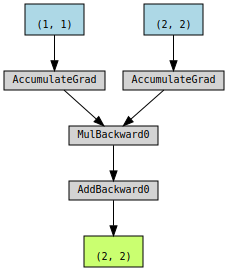

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
w = torch.rand(1, 1, requires_grad=True)
print(x)
print(w)
y = w * x + 2
print(y)
torchviz.make_dot(y)


## Playing with pytorch: linear regression

Code for plotting the surface

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_figs(fig_num, elev, azim, x, y, weights, bias):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)
    ax.scatter(x[:, 0], x[:, 1], y)
    ax.plot_surface(np.array([[0, 0], [1, 1]]),
                    np.array([[0, 1], [0, 1]]),
                    (np.dot(np.array([[0, 0, 1, 1],
                                          [0, 1, 0, 1]]).T, weights) + bias).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')

def plot_views(x, y, w, b):
    # Generate the different figures from different views
    elev = 43.5
    azim = -110
    plot_figs(1, elev, azim, x, y, w, b[0])

    plt.show()

Code for generating the 2D points

In [ ]:
#Data generation (2D points)
w_source = torch.tensor([2., -3.], dtype=torch.float).view(-1,1)
b_source  = torch.tensor([1.], dtype=torch.float)

x = torch.empty(30, 2).uniform_(0, 1) # input of the regression model

print(x.shape)
print(w_source.shape)
print(b_source.shape)

y = torch.matmul(x,w_source)+b_source # output of the regression model
print(y.shape)

torch.Size([30, 2])
torch.Size([2, 1])
torch.Size([1])
torch.Size([30, 1])


Plot the dataset

In [ ]:
plot_views(x.numpy(), y.numpy(), w_source.numpy(), b_source.numpy())

<Figure size 400x300 with 0 Axes>

In [ ]:
# Cellule d'initialisation
w_t_init = torch.empty(2, 1).uniform_(-1, 1)
b_t_init = torch.empty(1, 1).uniform_(-1, 1)

print("Valeurs initiales :")
print(f"w_t_init : {w_t_init}")
print(f"b_t_init : {b_t_init}")

Valeurs initiales :
w_t_init : tensor([[ 0.7053],
        [-0.7960]])
b_t_init : tensor([[0.1895]])


### Question: calculate the gradient of the loss and code it.

In [ ]:
def forward_t(x):
    return x.mm(w_t) + b_t

def loss_t(y_pred, y):
    return (y_pred - y).pow(2).sum()

def gradient_t(x, y):
    y_pred = forward_t(x)
    error = y_pred - y
    # Gradient pour MSE : 2 * X^T * Erreur
    grad_w = 2.0 * x.t().mm(error)
    # Gradient pour le biais : 2 * somme des erreurs
    grad_b = 2.0 * error.sum()
    return grad_w, grad_b

Main loop for computing the estimate (gradient descent)

### Question: code the gradient descent algorithm within the main loop.

In [ ]:
# Initialisation des variables de travail
w_t = w_t_init.clone()
b_t = b_t_init.clone()
learning_rate = 1e-4 # Valeur stable

for epoch in range(10):
    # 1. Prédiction
    y_pred = forward_t(x)

    # 2. Calcul de la perte
    l = loss_t(y_pred, y)

    # 3. Calcul des gradients
    grad_w, grad_b = gradient_t(x, y)

    # 4. Mise à jour (Descente de gradient)
    w_t -= learning_rate * grad_w
    b_t -= learning_rate * grad_b

    print(f"progress: epoch: {epoch}, loss: {l.item():.6f}")

progress: epoch: 0, loss: 19.966932
progress: epoch: 1, loss: 19.901594
progress: epoch: 2, loss: 19.837122
progress: epoch: 3, loss: 19.773499
progress: epoch: 4, loss: 19.710718
progress: epoch: 5, loss: 19.648762
progress: epoch: 6, loss: 19.587606
progress: epoch: 7, loss: 19.527252
progress: epoch: 8, loss: 19.467676
progress: epoch: 9, loss: 19.408867


In [ ]:
# After training
print("Estimation of the parameters:")
print(w_t)
print(b_t)

Estimation of the parameters:
tensor([[ 0.7188],
        [-0.7985]])
tensor([[0.2102]])


### Question: Test a higger learning rate (e.g., learning_rate = 1). Explain what you observe.

In [ ]:
# After training
print("Estimation of the parameters:")
print(f"Poids (w_t) : \n{w_t}")
print(f"Biais (b_t) : \n{b_t}")

Estimation of the parameters:
Poids (w_t) : 
tensor([[ 0.7188],
        [-0.7985]])
Biais (b_t) : 
tensor([[0.2102]])


En testant un learning rate élevé (ex:1), on observe une instabilité totale du modèle.

Au lieu de converger vers un minimum, la fonction de perte diverge et augmente de manière exponentielle à chaque itération. Ce phénomène s'explique par l'overshooting.

Pour ce modèle, un taux beaucoup plus faible (comme $10^{-6}$) est nécessaire pour assurer une descente de gradient fluide et stable.

### Question: How to improve the quality of the estimate?

Pour obtenir une estimation de haute qualité, il est primordiale de trouver un équilibre entre la vitesse et la stabilité de l'apprentissage.

L'utilisation d'un taux d'apprentissage adapté est souvent très petit (comme $10^{-6}$) permet d'éviter la divergence des paramètres et d'atteindre précisément le minimum de la fonction de perte.

En plus du réglage manuel, l'adoption d'outils plus sophistiqués comme l'optimiseur Adam ou l'utilisation de la bibliothèque torch.nn permet d'automatiser ces calculs complexes, garantissant ainsi une convergence plus rapide et des prédictions beaucoup plus proches des valeurs réelles.